In [1]:
# =====================================================
# CELDA 1: Importación de librerías
# =====================================================
import pandas as pd   # Librería para manejo de datos (tablas, CSV, etc.)
import numpy as np    # Librería para operaciones numéricas
import matplotlib.pyplot as plt  # Librería para gráficos básicos
import seaborn as sns  # Librería para gráficos estadísticos
from sklearn.model_selection import train_test_split  # Para dividir dataset en train/test
from sklearn.preprocessing import StandardScaler      # Para escalar datos
from sklearn.linear_model import LogisticRegression   # Modelo de regresión logística
from sklearn.ensemble import RandomForestClassifier   # Modelo de Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Métricas

# La siguiente línea permite ver las gráficas dentro del Notebook
%matplotlib inline

In [2]:
# =====================================================
# CELDA 2: Carga de datos
# =====================================================
# Lee el archivo CSV desde la carpeta data
# Asegúrate de que el archivo 'SteelPlateFaults.csv' esté en la carpeta ../data/
data_path = "../data/SteelPlateFaults.csv"  # Ruta relativa al CSV
df = pd.read_csv(data_path)

# Muestra las primeras filas para verificar la carga correcta
df.head()

,Thickness,Width,Length,Hardness,TensileStrength,Elongation,SurfaceRoughness,Temperature,Pressure,CoolingRate,Defect_Type,Defective
0,6.869022,1287.271041,2494.563274,249.901073,664.999155,11.847417,1.950619,565.635579,124.728010,3.634358,Scratch,1
1,14.359286,1446.871319,2331.648385,324.024032,392.255998,11.215075,1.431948,223.342081,73.704444,8.259015,NaN,0
2,11.515921,2209.094786,1704.615650,268.800034,473.319847,22.083839,2.897046,567.356205,81.589806,9.946580,NaN,0
3,9.782560,1180.008772,3429.066680,124.990775,631.640318,29.322326,0.735038,253.801164,95.167782,8.487235,Crack,1
4,4.028242,2239.299370,2906.496642,155.674071,541.044672,20.054426,1.804784,626.206543,100.913334,3.788358,NaN,0


In [3]:
# =====================================================
# CELDA 3: Exploración rápida de los datos
# =====================================================
# Verifiquemos la dimensión de nuestro dataframe
# Filas y columnas
print("Dimensión del dataset:", df.shape)

# Revisar información general de columnas y tipos de datos
df.info()

# Estadísticas descriptivas de las variables numéricas
df.describe()


Dimensión del dataset: (5000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thickness         5000 non-null   float64
 1   Width             5000 non-null   float64
 2   Length            5000 non-null   float64
 3   Hardness          5000 non-null   float64
 4   TensileStrength   5000 non-null   float64
 5   Elongation        5000 non-null   float64
 6   SurfaceRoughness  5000 non-null   float64
 7   Temperature       5000 non-null   float64
 8   Pressure          5000 non-null   float64
 9   CoolingRate       5000 non-null   float64
 10  Defect_Type       1514 non-null   object 
 11  Defective         5000 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 468.9+ KB


,Thickness,Width,Length,Hardness,TensileStrength,Elongation,SurfaceRoughness,Temperature,Pressure,CoolingRate,Defective
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.458816,1482.974249,3005.500214,252.305410,554.388557,19.826473,1.551781,498.087477,174.614040,5.205079,0.302800
std,3.765237,571.233019,1163.079271,86.341865,144.370634,5.691080,0.836144,173.807090,72.324258,2.748269,0.459515
min,2.000151,500.105654,1000.630978,100.075736,300.024062,10.002205,0.100016,200.108023,50.004184,0.500995,0.000000
25%,5.170216,994.291817,1988.669304,178.818786,429.447895,14.942909,0.817820,347.730288,112.045499,2.798424,0.000000
50%,8.500112,1471.943148,2984.788533,253.734892,556.670191,19.819552,1.555514,499.010525,172.843406,5.211319,0.000000
75%,11.725311,1966.743197,4042.476018,325.331672,678.848317,24.643040,2.269857,648.187146,238.368833,7.607411,1.000000
max,14.996330,2499.010379,4999.220577,399.977448,799.950489,29.994642,2.999389,799.561211,299.993037,9.999591,1.000000


In [4]:
# =====================================================
# CELDA 4: Comprobación de valores nulos y duplicados
# =====================================================
# Contemos el número de valores nulos en cada columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Comprobar si hay registros duplicados
duplicados = df.duplicated().sum()  # Cantidad de filas duplicadas
print("\nCantidad de filas duplicadas en el dataset:", duplicados)

# El manejo de duplicados podría hacerse así:
# df = df.drop_duplicates()


Valores nulos por columna:
Thickness              0
Width                  0
Length                 0
Hardness               0
TensileStrength        0
Elongation             0
SurfaceRoughness       0
Temperature            0
Pressure               0
CoolingRate            0
Defect_Type         3486
Defective              0
dtype: int64

Cantidad de filas duplicadas en el dataset: 0


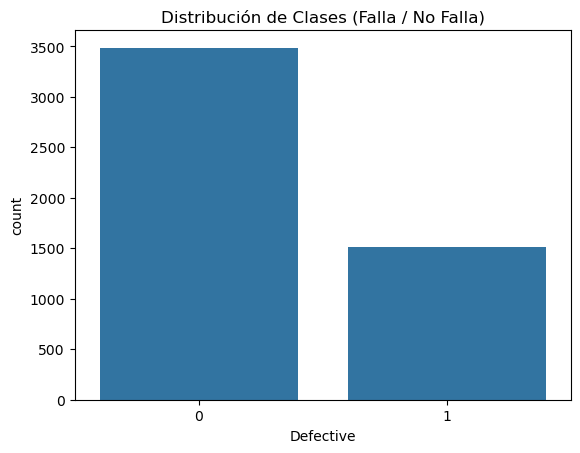

Defective
0    3486
1    1514
Name: count, dtype: int64


In [5]:
# =====================================================
# CELDA 5: Distribución de la variable target
# =====================================================
# Asumiendo que el dataset tiene una columna 'Class' o similar que indica la falla
# Ajusta el nombre de la columna objetivo de acuerdo al dataset real
# (Algunos datasets de Steel Plate Faults tienen columnas de defecto como "Pastry", "Z_Scratch", etc.)
# Aquí tomaremos la última columna como 'target' a modo de ejemplo.

target_column = "Defective"  # Cambia esto según el nombre real en tu dataset
if target_column not in df.columns:
    # Si no existe 'Class', mostramos las columnas disponibles para ajustarnos
    print("Las columnas disponibles en el dataset son:")
    print(df.columns)
else:
    # Si existe, graficamos la distribución
    sns.countplot(data=df, x=target_column)
    plt.title("Distribución de Clases (Falla / No Falla)")
    plt.show()

    # Conteo de cada clase
    print(df[target_column].value_counts())


In [6]:
# =====================================================
# CELDA 6: Separación de Features (X) y Target (y)
# =====================================================
# Ajusta la lista de columnas que quieras usar para el modelo.
# Supongamos que TODAS las columnas menos 'Class' son nuestras features.

features = [col for col in df.columns if col != target_column]  # Todas menos la columna target
X = df[features]  # Variables independientes
y = df[target_column]  # Variable dependiente (columna 'Class')

# Visualicemos un poco
print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

Dimensión de X: (5000, 11)
Dimensión de y: (5000,)


In [7]:
# =====================================================
# CELDA 7: División en entrenamiento y prueba
# =====================================================
# Separamos el dataset en dos partes: entrenamiento (train) y prueba (test)
# train_test_split retornará 4 elementos: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X,           # Features
    y,           # Target
    test_size=0.2,    # 20% de datos para test
    random_state=42,  # Semilla para reproducibilidad
    stratify=y        # Para mantener la proporción de clases
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (4000, 11)
Tamaño de X_test: (1000, 11)
Tamaño de y_train: (4000,)
Tamaño de y_test: (1000,)


In [8]:
# =====================================================
# CELDA 8: Escalado de Datos (opcional, pero recomendado)
# =====================================================
# Muchas veces se recomienda escalar los datos numéricos antes de entrenar modelos.
# Aquí usaremos StandardScaler que normaliza con media 0 y desviación estándar 1.

from sklearn.preprocessing import StandardScaler

# Removemos la columna categórica "Defect_Type" de las features
X_train_num = X_train.drop(columns=["Defect_Type"])  # Eliminar la columna categórica
X_test_num = X_test.drop(columns=["Defect_Type"])    # Igual en el conjunto de test

# Aplicar escalado solo a las columnas numéricas
scaler = StandardScaler()
scaler.fit(X_train_num)  # Ajustamos el escalador con los datos numéricos

X_train_scaled = scaler.transform(X_train_num)  # Transformamos los datos numéricos de entrenamiento
X_test_scaled = scaler.transform(X_test_num)    # Transformamos los datos numéricos de test

# X_train_scaled y X_test_scaled ahora contienen solo valores numéricos escalados y pueden usarse en el modelo